# Time Series - Transformation

## covid19_pt.csv
Daily death reports from covid in the year of 2020

### Imports

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import ts_functions as ts

Nr. Records =  323
First timestamp 2020-01-22 00:00:00
Last timestamp 2020-12-09 00:00:00


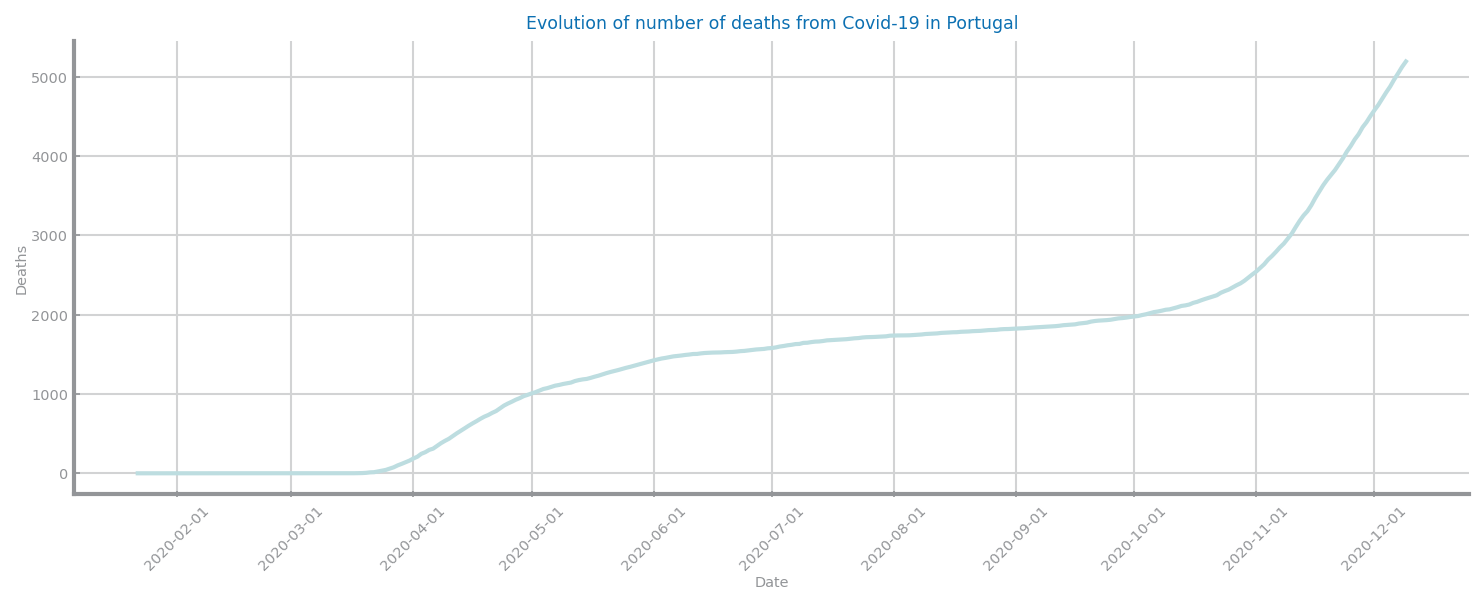

            deaths
Date              
2020-01-22       0
2020-01-23       0
2020-01-24       0
2020-01-25       0
2020-01-26       0
...            ...
2020-12-05    4876
2020-12-06    4963
2020-12-07    5041
2020-12-08    5122
2020-12-09    5192

[323 rows x 1 columns]


In [20]:
data = pd.read_csv('covid19_pt.csv', index_col='Date', sep=',', decimal='.',
                   parse_dates=True, infer_datetime_format=True)

data = data.sort_values(by=["Date"]) #Dates weren't sorted


print("Nr. Records = ", data.shape[0])
print("First timestamp", data.index[0])
print("Last timestamp", data.index[-1])
plt.figure(figsize=(3*ts.HEIGHT, ts.HEIGHT))
ts.plot_series(data, x_label='Date', y_label='Deaths', title='Evolution of number of deaths from Covid-19 in Portugal')
plt.xticks(rotation = 45)
plt.show()

print(data)

### Smoothing

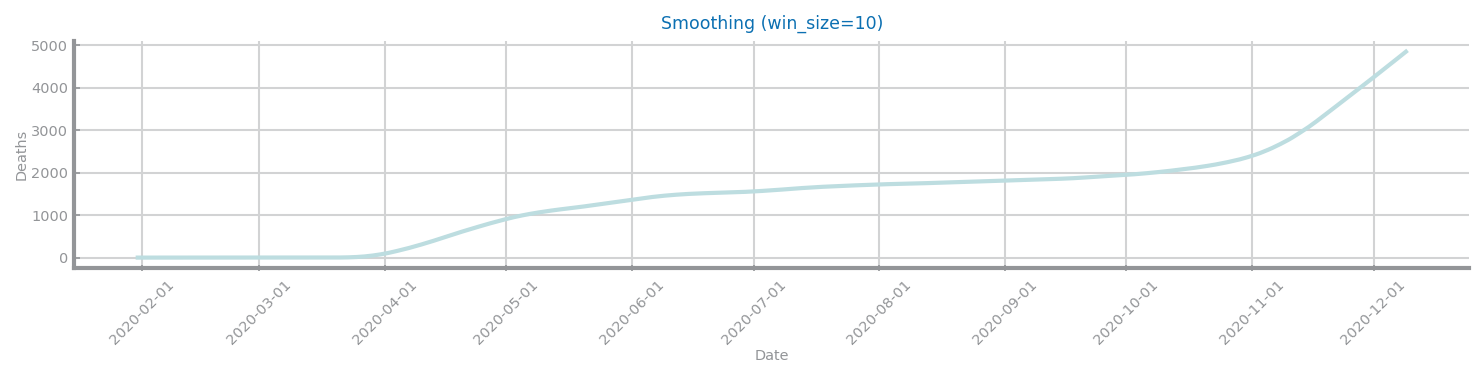

In [21]:
WIN_SIZE = 10
rolling = data.rolling(window=WIN_SIZE)
smooth_df = rolling.mean()
plt.figure(figsize=(3*ts.HEIGHT, ts.HEIGHT/2))
ts.plot_series(smooth_df, title=f'Smoothing (win_size={WIN_SIZE})', x_label='Date', y_label='Deaths')
plt.xticks(rotation = 45)
plt.show()

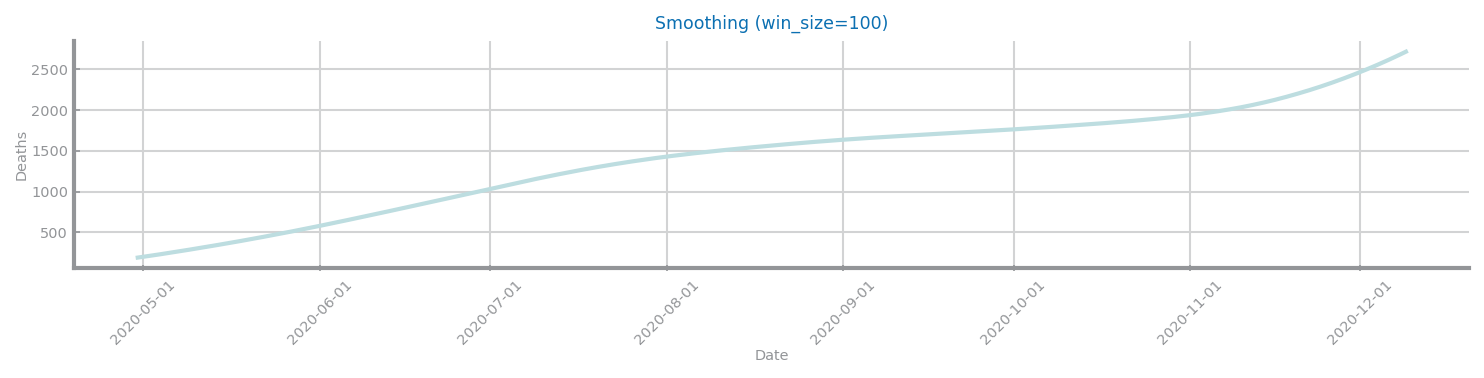

In [22]:
WIN_SIZE = 100
rolling = data.rolling(window=WIN_SIZE)
smooth_df = rolling.mean()
plt.figure(figsize=(3*ts.HEIGHT, ts.HEIGHT/2))
ts.plot_series(smooth_df, title=f'Smoothing (win_size={WIN_SIZE})', x_label='Date', y_label='Deaths')
plt.xticks(rotation = 45)
plt.show()

### Aggregation

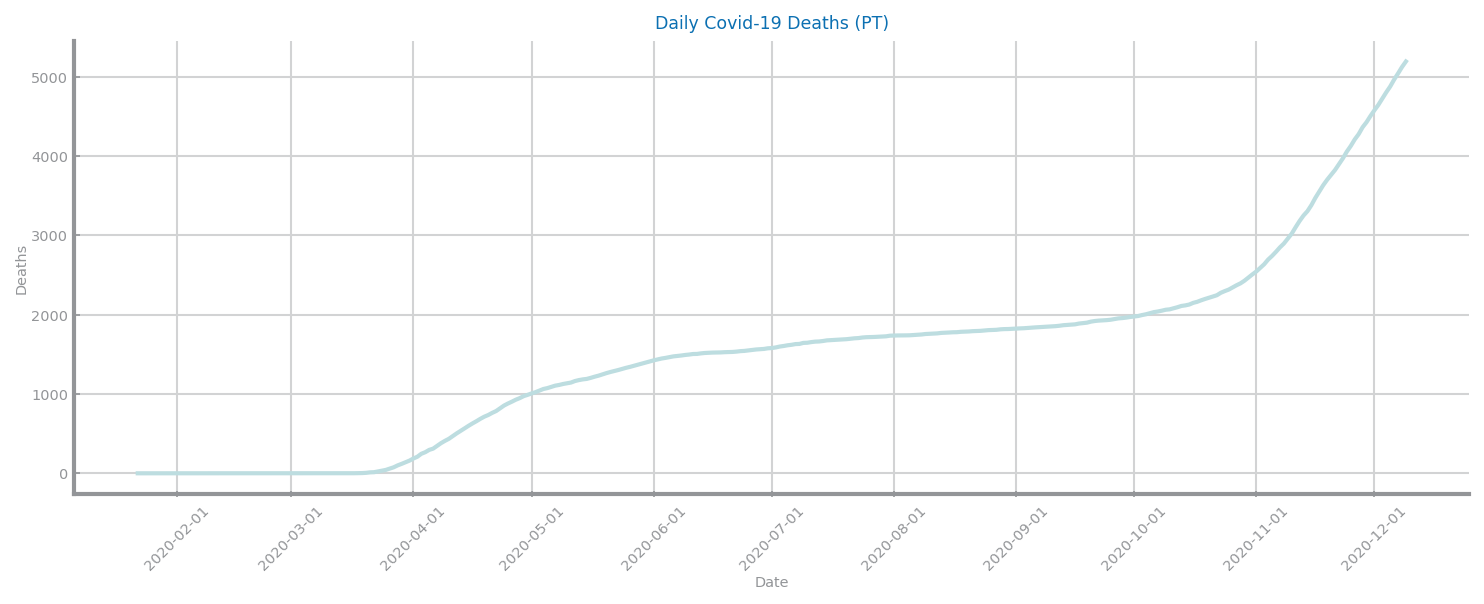

In [23]:
def aggregate_by(data: pd.Series, index_var: str, period: str, title: str = '', x_label: str = '', y_label: str = ''):
    index = data.index.to_period(period)
    agg_df = data.copy().groupby(index).mean()
    agg_df[index_var] = index.drop_duplicates().to_timestamp()
    agg_df.set_index(index_var, drop=True, inplace=True)
    ts.plot_series(agg_df, title=title, x_label=x_label, y_label=y_label)

plt.figure(figsize=(3*ts.HEIGHT, ts.HEIGHT))
aggregate_by(data, 'Date', 'D', title='Daily Covid-19 Deaths (PT)', x_label='Date', y_label='Deaths')
plt.xticks(rotation = 45)
plt.show()

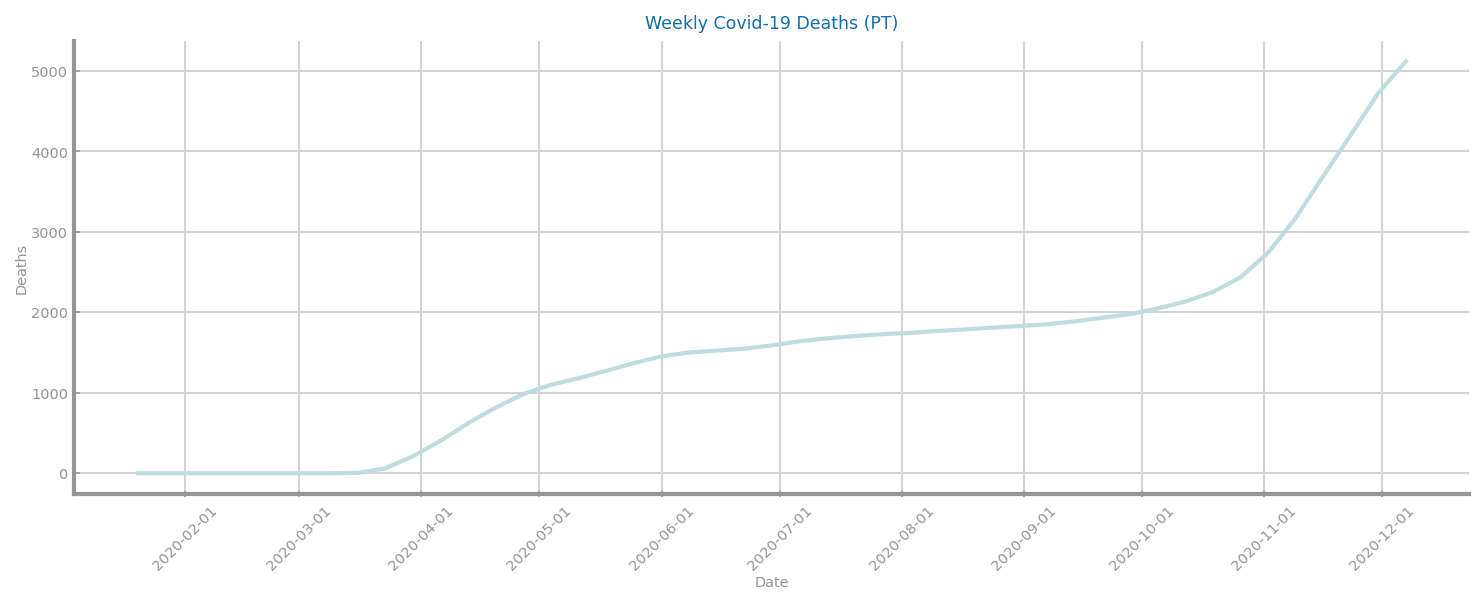

In [24]:
plt.figure(figsize=(3*ts.HEIGHT, ts.HEIGHT))
aggregate_by(data, 'Date', 'W', title='Weekly Covid-19 Deaths (PT)', x_label='Date', y_label='Deaths')
plt.xticks(rotation = 45)
plt.show()

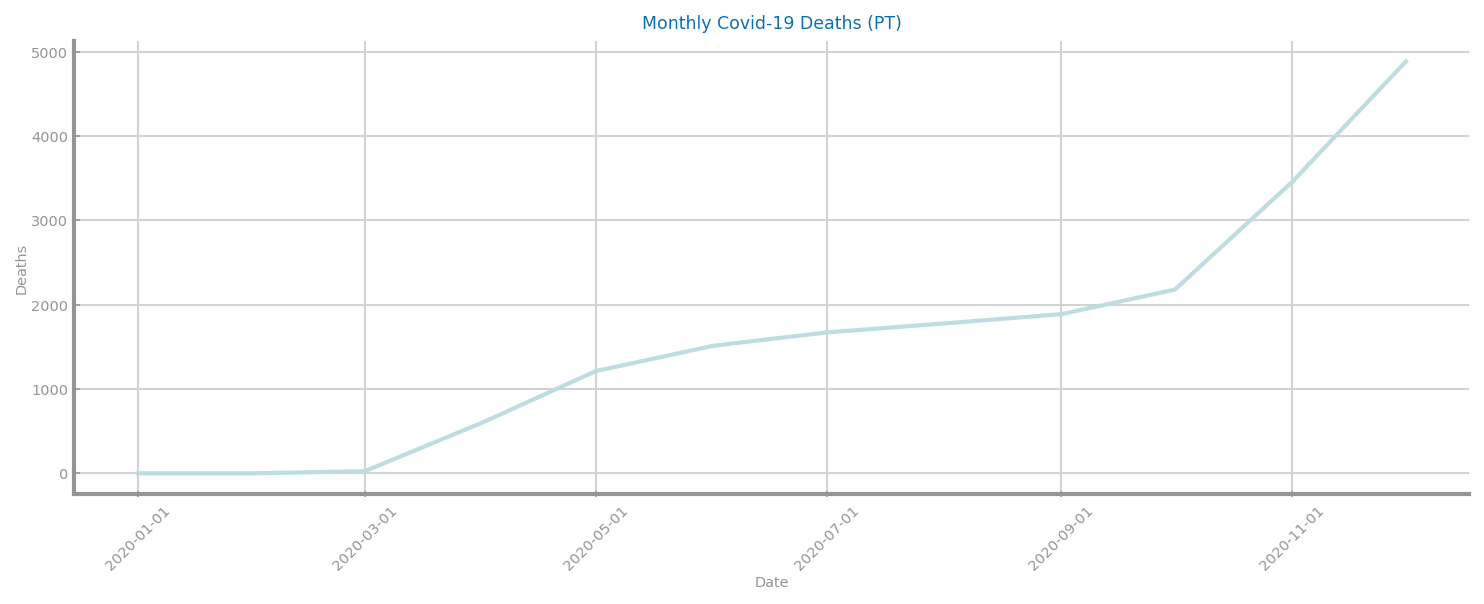

In [25]:
plt.figure(figsize=(3*ts.HEIGHT, ts.HEIGHT))
aggregate_by(data, 'Date', 'M', title='Monthly Covid-19 Deaths (PT)', x_label='Date', y_label='Deaths')
plt.xticks(rotation = 45)
plt.show()

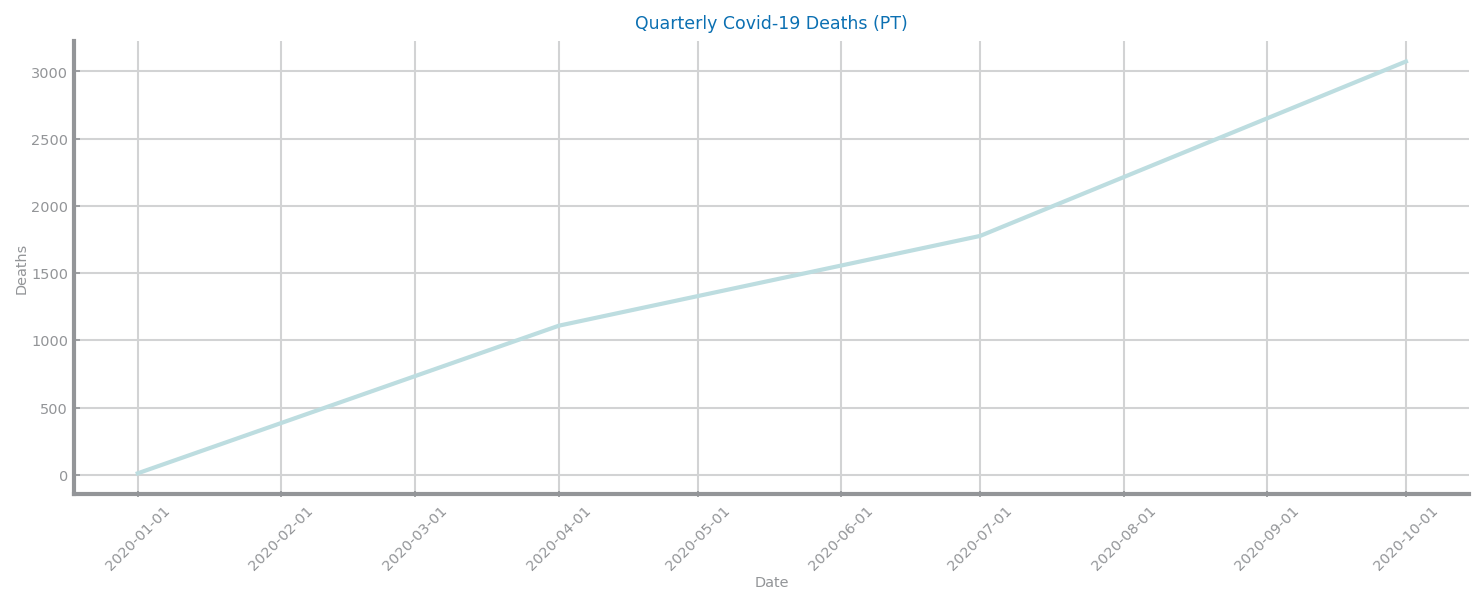

In [26]:
plt.figure(figsize=(3*ts.HEIGHT, ts.HEIGHT))
aggregate_by(data, 'Date', 'Q', title='Quarterly Covid-19 Deaths (PT)', x_label='Date', y_label='Deaths')
plt.xticks(rotation = 45)
plt.show()

### Differentiation

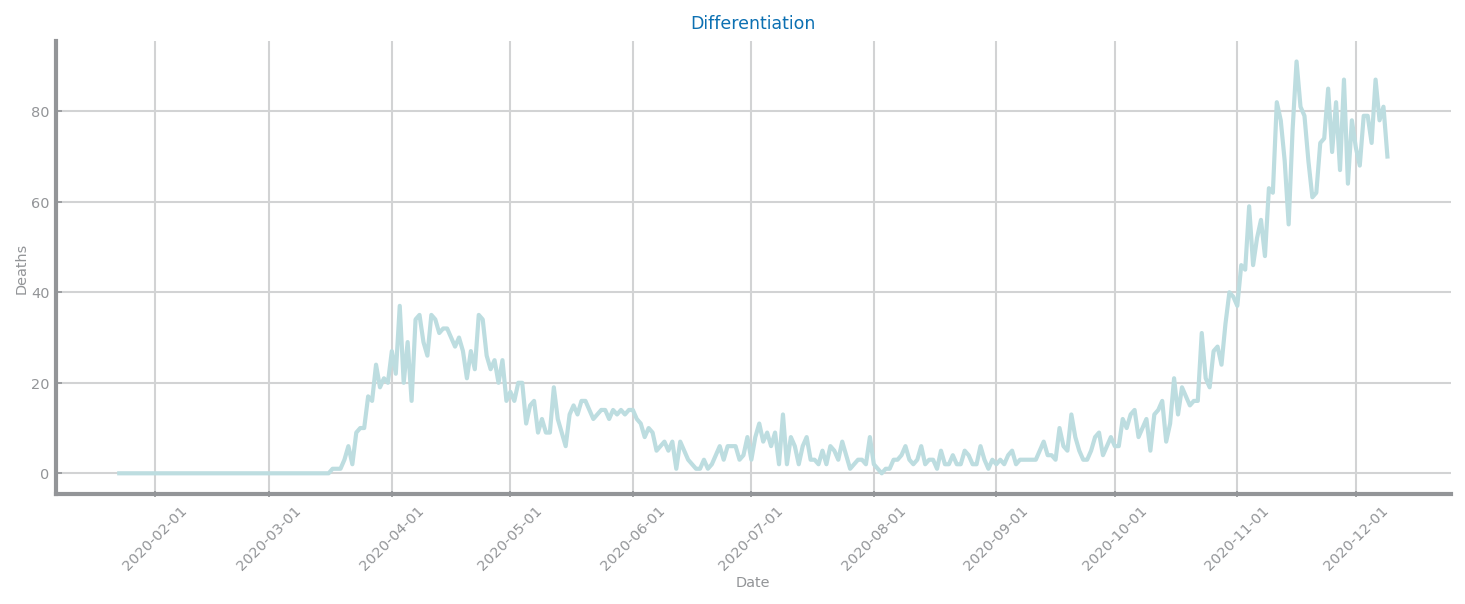

In [27]:
diff_df = data.diff()
plt.figure(figsize=(3*ts.HEIGHT, ts.HEIGHT))
ts.plot_series(diff_df, title='Differentiation', x_label='Date', y_label='Deaths')
plt.xticks(rotation = 45)
plt.show()

## deaths_pt.csv
Weekly death reports from 2015 to 2020

### Imports

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import ts_functions as ts

Nr. Records =  286
First timestamp 2015-01-05 00:00:00
Last timestamp 2020-09-07 00:00:00


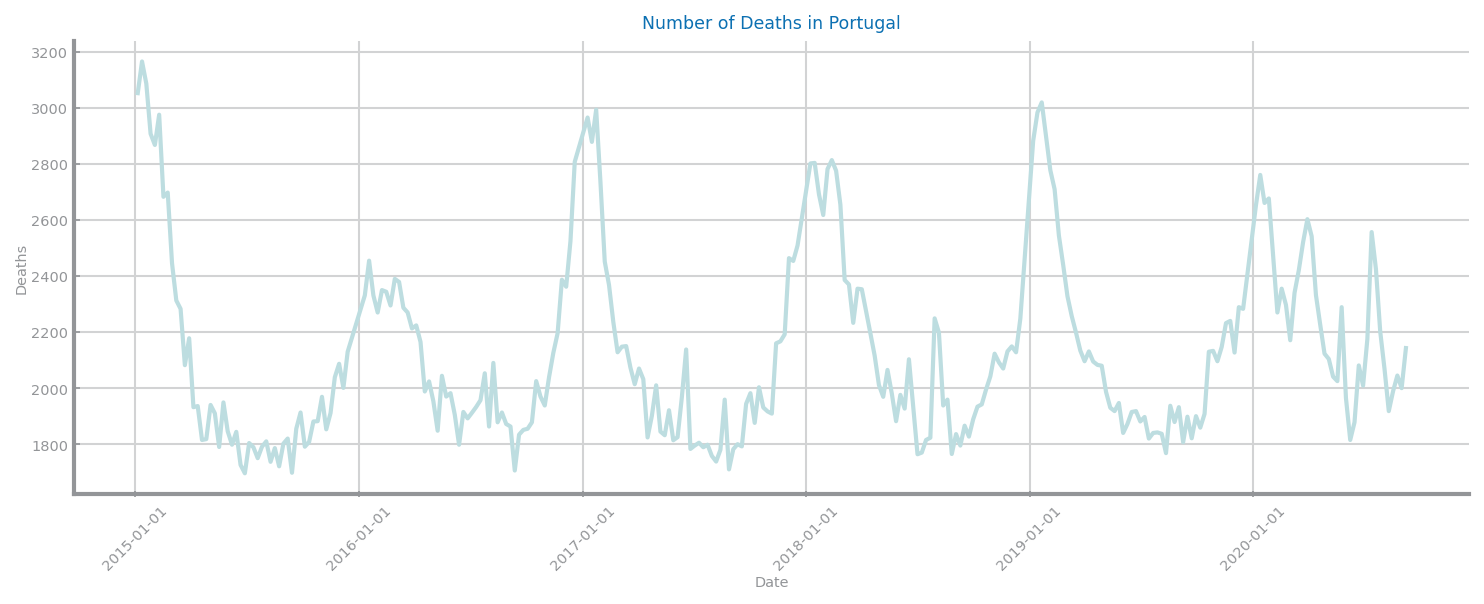

            deaths
start_date        
2015-01-05    3054
2015-01-12    3167
2015-01-19    3088
2015-01-26    2909
2015-02-02    2869
...            ...
2020-08-10    1919
2020-08-17    1990
2020-08-24    2046
2020-08-31    2001
2020-09-07    2144

[286 rows x 1 columns]


In [29]:
data = pd.read_csv('deaths_pt.csv', index_col='start_date', sep=',', decimal='.',
                   parse_dates=True, infer_datetime_format=True)

data = data.sort_values(by=["start_date"]) #Dates weren't sorted


print("Nr. Records = ", data.shape[0])
print("First timestamp", data.index[0])
print("Last timestamp", data.index[-1])
plt.figure(figsize=(3*ts.HEIGHT, ts.HEIGHT))
ts.plot_series(data, x_label='Date', y_label='Deaths', title='Number of Deaths in Portugal')
plt.xticks(rotation = 45)
plt.show()

print(data)

### Smoothing

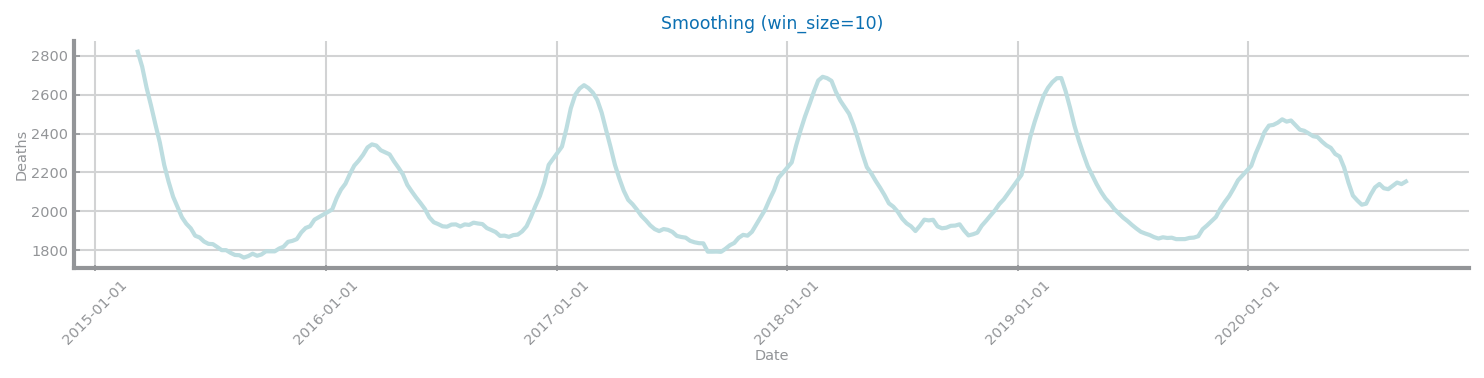

In [30]:
WIN_SIZE = 10
rolling = data.rolling(window=WIN_SIZE)
smooth_df = rolling.mean()
plt.figure(figsize=(3*ts.HEIGHT, ts.HEIGHT/2))
ts.plot_series(smooth_df, title=f'Smoothing (win_size={WIN_SIZE})', x_label='Date', y_label='Deaths')
plt.xticks(rotation = 45)
plt.show()

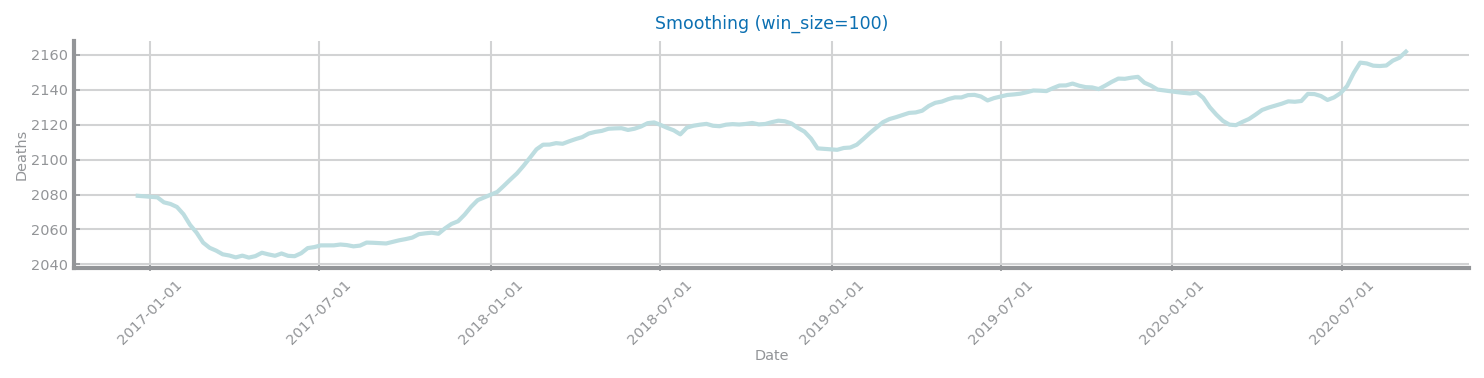

In [31]:
WIN_SIZE = 100
rolling = data.rolling(window=WIN_SIZE)
smooth_df = rolling.mean()
plt.figure(figsize=(3*ts.HEIGHT, ts.HEIGHT/2))
ts.plot_series(smooth_df, title=f'Smoothing (win_size={WIN_SIZE})', x_label='Date', y_label='Deaths')
plt.xticks(rotation = 45)
plt.show()

### Aggregation

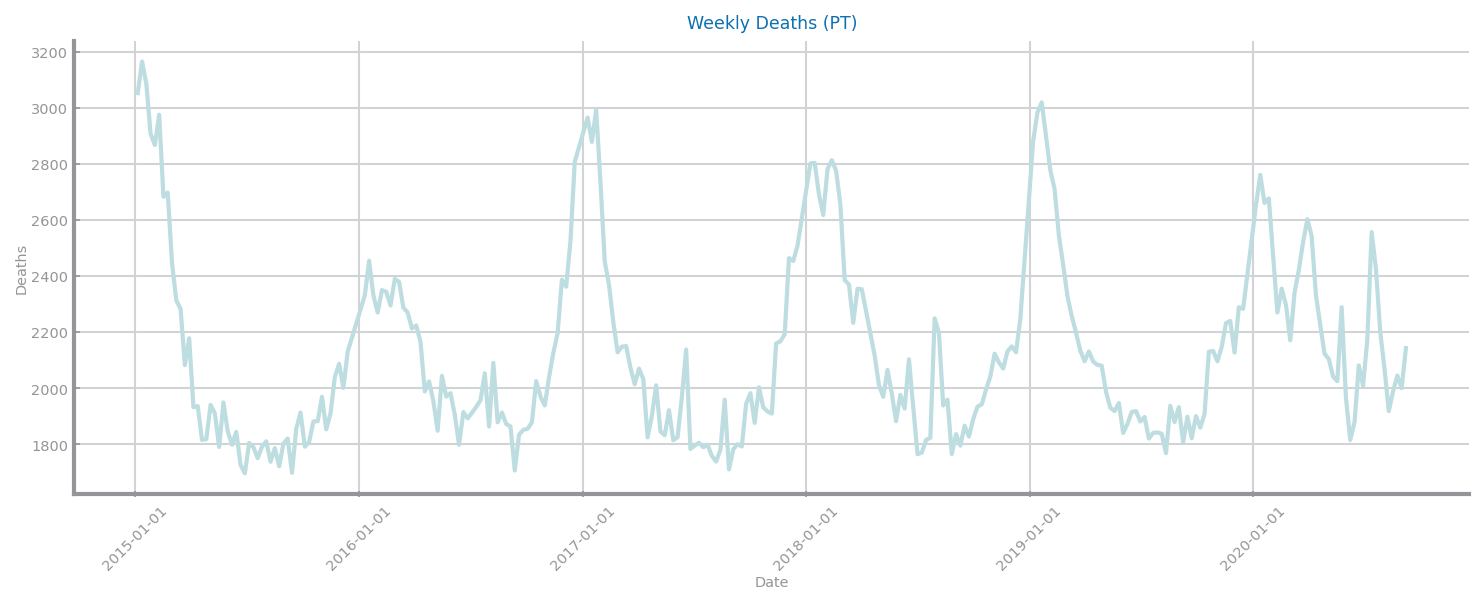

In [32]:
def aggregate_by(data: pd.Series, index_var: str, period: str, title: str = '', x_label: str = '', y_label: str = ''):
    index = data.index.to_period(period)
    agg_df = data.copy().groupby(index).mean()
    agg_df[index_var] = index.drop_duplicates().to_timestamp()
    agg_df.set_index(index_var, drop=True, inplace=True)
    ts.plot_series(agg_df, title=title, x_label=x_label, y_label=y_label)

plt.figure(figsize=(3*ts.HEIGHT, ts.HEIGHT))
aggregate_by(data, 'start_date', 'W', title='Weekly Deaths (PT)', x_label='Date', y_label='Deaths')
plt.xticks(rotation = 45)
plt.show()

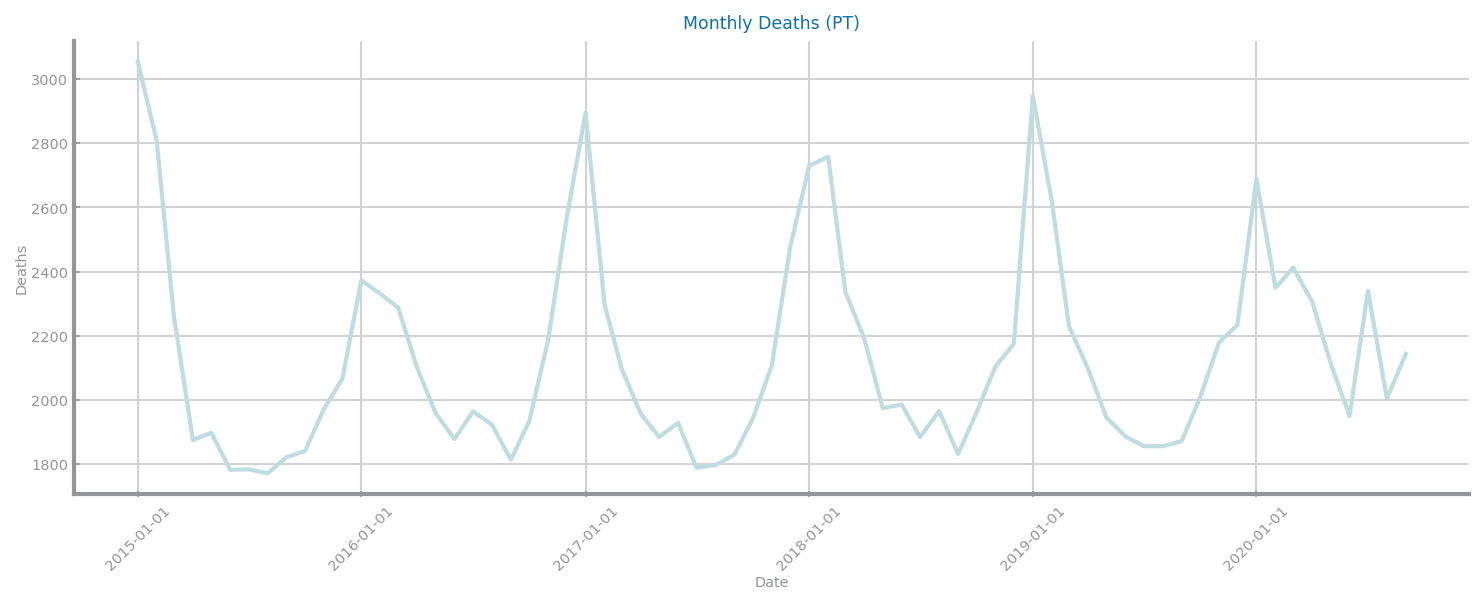

In [33]:
plt.figure(figsize=(3*ts.HEIGHT, ts.HEIGHT))
aggregate_by(data, 'start_date', 'M', title='Monthly Deaths (PT)', x_label='Date', y_label='Deaths')
plt.xticks(rotation = 45)
plt.show()

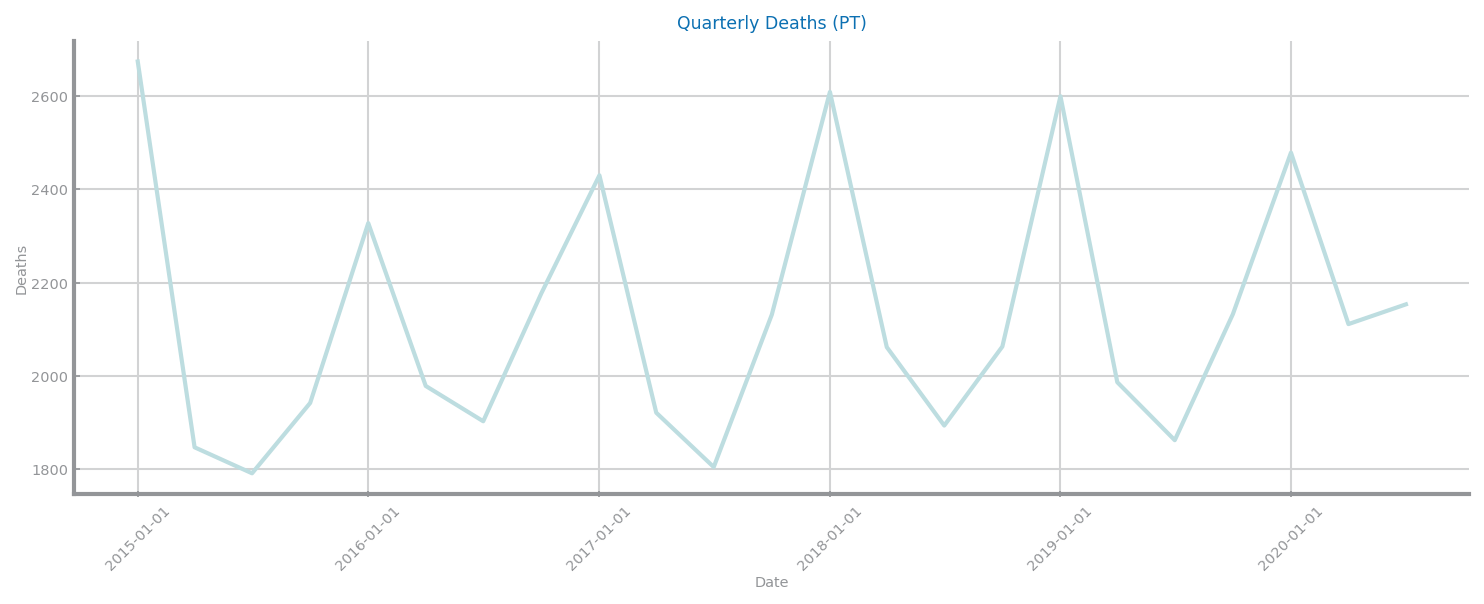

In [34]:
plt.figure(figsize=(3*ts.HEIGHT, ts.HEIGHT))
aggregate_by(data, 'start_date', 'Q', title='Quarterly Deaths (PT)', x_label='Date', y_label='Deaths')
plt.xticks(rotation = 45)
plt.show()

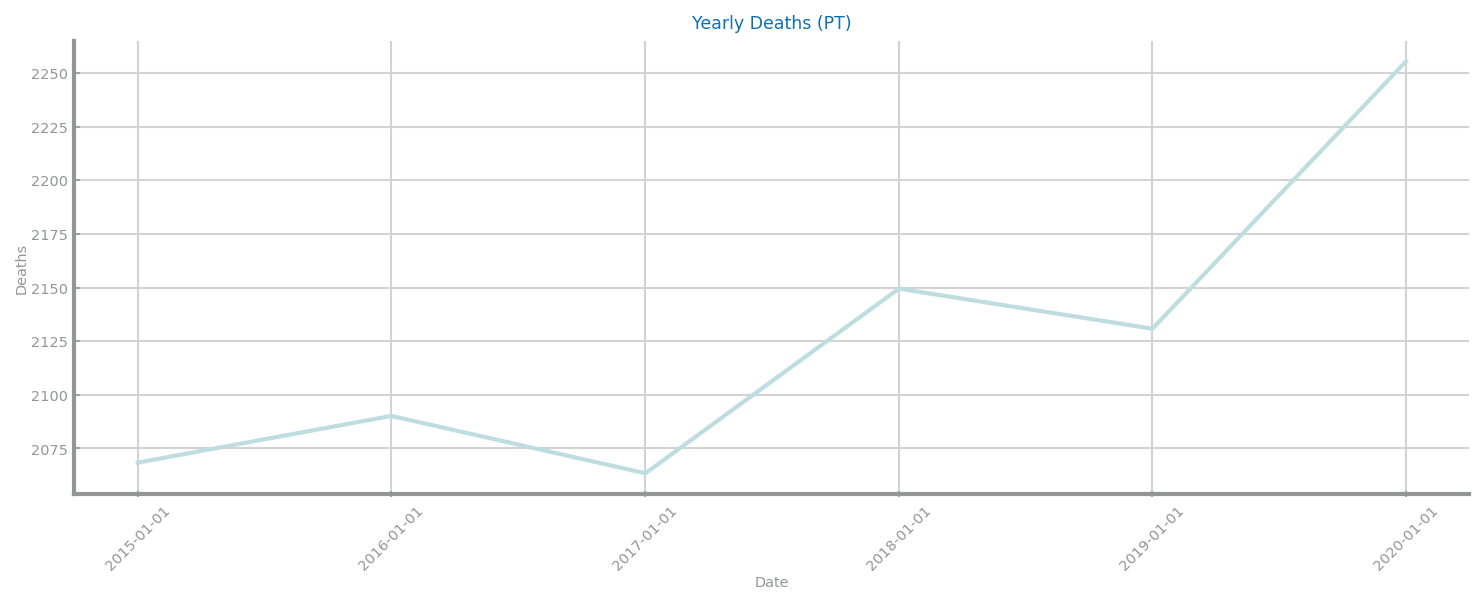

In [35]:
plt.figure(figsize=(3*ts.HEIGHT, ts.HEIGHT))
aggregate_by(data, 'start_date', 'Y', title='Yearly Deaths (PT)', x_label='Date', y_label='Deaths')
plt.xticks(rotation = 45)
plt.show()

### Differentiation

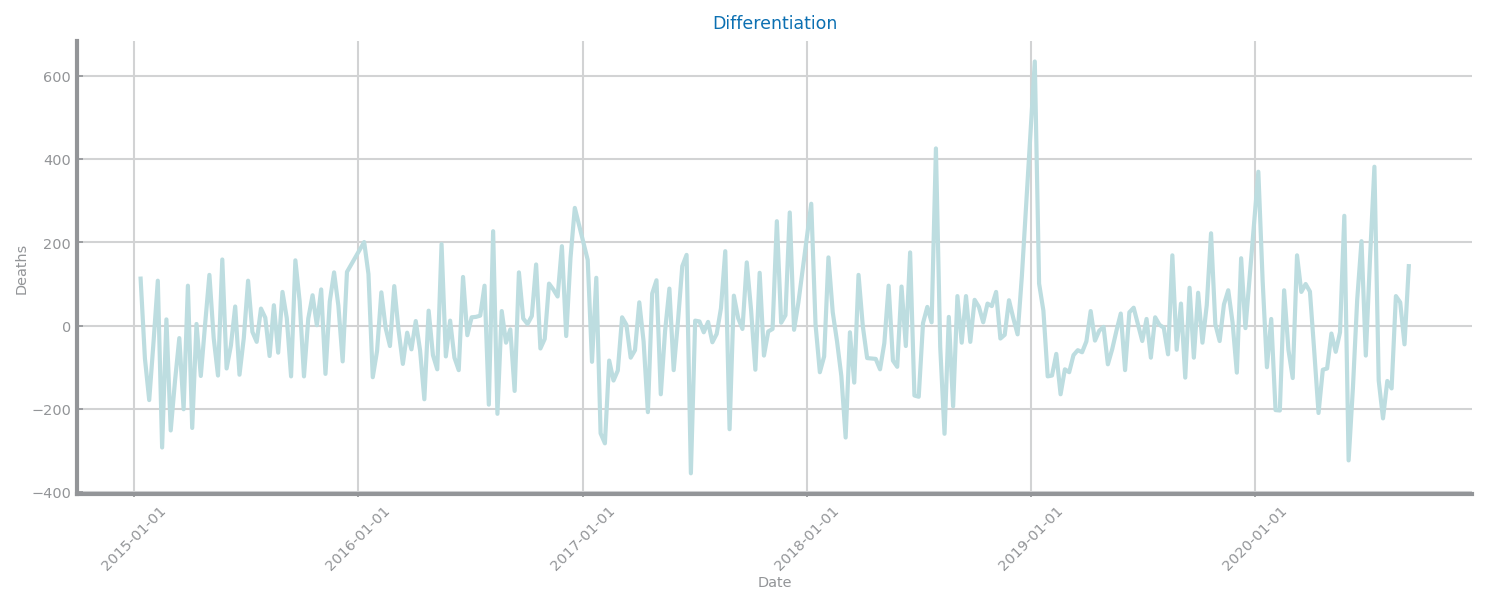

In [18]:
diff_df = data.diff()
plt.figure(figsize=(3*ts.HEIGHT, ts.HEIGHT))
ts.plot_series(diff_df, title='Differentiation', x_label='Date', y_label='Deaths')
plt.xticks(rotation = 45)
plt.show()